# Bird Bone Classification

## About Dataset

Context
There are many kinds of birds: pigeons, ducks, ostriches, penguins… Some are good at flying, others can't fly but run fast. Some swim under water, others wading in shallow pool.

According to their living environments and living habits, birds are classified into different ecological groups. There are 8 ecological groups of birds:

- Swimming Birds
- Wading Birds
- Terrestrial Birds
- Raptors
- Scansorial Birds
- Singing Birds
- Cursorial Birds (not included in dataset)
- Marine Birds (not included in dataset)

First 6 groups are main and are covered by this dataset.

Apparently, birds belong to different ecological groups have different appearances: flying birds have strong wings and wading birds have long legs. Their living habits are somewhat reflected in their bones' shapes. As data scientists we may think of examining the underlying relationship between sizes of bones and ecological groups, and recognizing birds' ecological groups by their bones' shapes.

Content
There are 420 birds contained in this dataset. Each bird is represented by 10 measurements (features):

- Length and Diameter of Humerus
- Length and Diameter of Ulna
- Length and Diameter of Femur
- Length and Diameter of Tibiotarsus
- Length and Diameter of Tarsometatarsus

All measurements are continuous float numbers (mm) with missing values represented by empty strings. The skeletons of this dataset are collections of Natural History Museum of Los Angeles County. They belong to 21 orders, 153 genera, 245 species.

Each bird has a label for its ecological group:

- SW: Swimming Birds
- W: Wading Birds
- T: Terrestrial Birds
- R: Raptors
- P: Scansorial Birds
- SO: Singing Birds


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Obtain the dataset here: https://www.kaggle.com/datasets/zhangjuefei/birds-bones-and-living-habits/download?datasetVersionNumber=1
# Load the data
data = pd.read_csv('bird.csv')

data.head()


,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [2]:
# Drop rows with missing values
data.dropna(inplace=True)

# Drop the id column
data = data.drop('id', axis=1)

# Compute the correlation matrix
corr_matrix = data.corr()

# Split the data into training and testing sets
X = data.drop('type', axis=1)
y = data['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-2-b72f0e74ffe3>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.7951807228915663


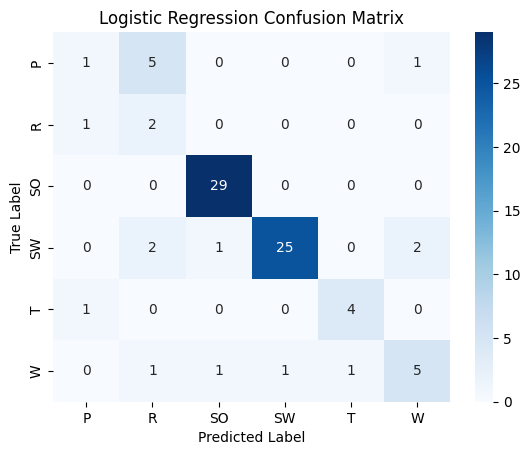

Random Forest accuracy: 0.8192771084337349


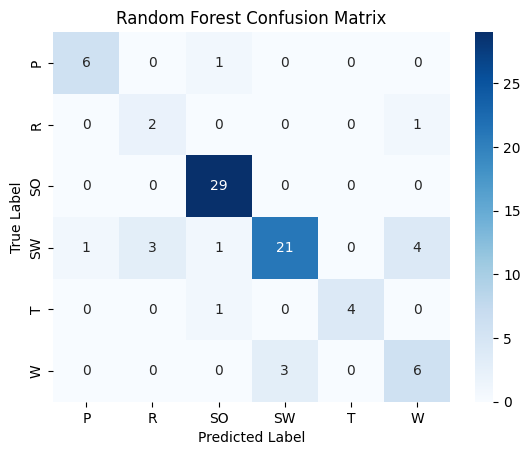

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network accuracy: 0.9036144578313253


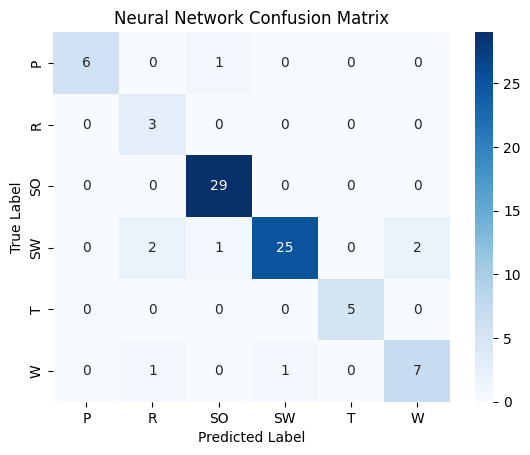

In [3]:
# Train and evaluate the models
models = [('Logistic Regression', LogisticRegression(random_state=42)),
          ('Random Forest', RandomForestClassifier(random_state=42)),
          ('Neural Network', MLPClassifier(random_state=42, max_iter=1000))]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {acc}')
    
    # Visualize the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

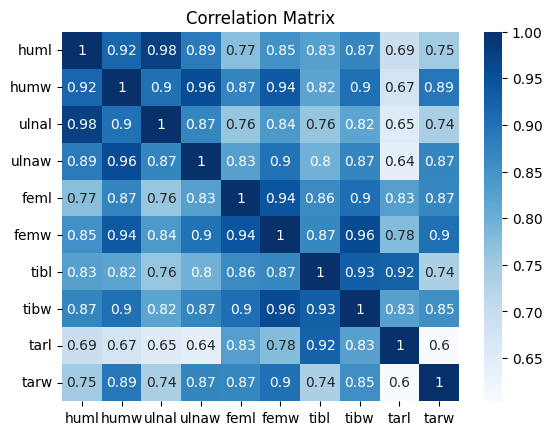

In [4]:
# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()